In [3]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et


# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [5]:
path = "data/805325-precip-daily-2003-2013.csv"

#import file as df
boulder_precip_2003_2013 = pd.read_csv(path)
boulder_precip_2003_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATION           1840 non-null   object 
 1   STATION_NAME      1840 non-null   object 
 2   ELEVATION         1840 non-null   float64
 3   LATITUDE          1840 non-null   float64
 4   LONGITUDE         1840 non-null   float64
 5   DATE              1840 non-null   object 
 6   HPCP              1840 non-null   float64
 7   Measurement Flag  1840 non-null   object 
 8   Quality Flag      1840 non-null   object 
dtypes: float64(4), object(5)
memory usage: 129.5+ KB


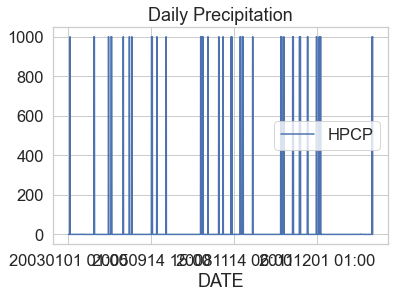

In [6]:
#initial graphs
boulder_precip_2003_2013.plot(x="DATE",
                              y="HPCP",
                             title="Daily Precipitation")
plt.show()

In [7]:
#Time Series Data Cleaning & Exploration
boulder_precip_2003_2013["HPCP"].describe()

count    1840.000000
mean       51.192587
std       220.208147
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max       999.990000
Name: HPCP, dtype: float64

In [10]:
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [11]:
#reimport data using datetime
boulder_precip_2003_2013 = pd.read_csv(path,
                                   parse_dates=['DATE'],
                                   index_col=['DATE'],
                                   na_values=['999.99'])
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [15]:
boulder_precip_2003_2013.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


In [16]:
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

In [17]:
boulder_precip_2003_2013.reset_index()

,DATE,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
0,2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
1,2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2,2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
3,2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
4,2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
...,...,...,...,...,...,...,...,...,...
1835,2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,
1836,2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,],
1837,2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,0.1,,
1838,2013-12-29 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,


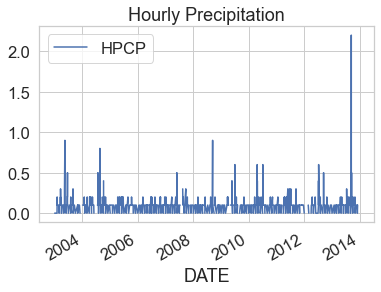

In [19]:
boulder_precip_2003_2013.plot(y="HPCP",
                             title="Hourly Precipitation")
plt.show()

In [20]:
precip_2005 = boulder_precip_2003_2013['2005']
precip_2005.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-01-02 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
2005-01-02 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,},
2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [21]:
precip_2005_clean = precip_2005.dropna()

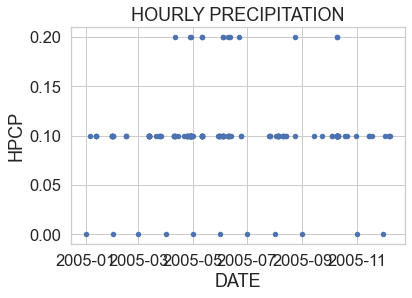

In [22]:
precip_2005_clean.reset_index().plot(x='DATE',
                                    y='HPCP',
                                    title='HOURLY PRECIPITATION',
                                    kind='scatter')
plt.show()

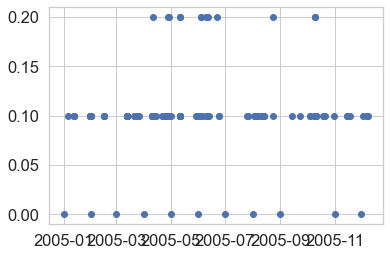

In [23]:
#plotting the data using native matplotlib
f, ax = plt.subplots()
ax.scatter(x=precip_2005_clean.index.values,
          y=precip_2005_clean["HPCP"])
plt.show()

In [27]:
precip_2005_clean.resample("D").sum()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2005-01-01,1650.5,40.03389,-105.28111,0.0
2005-01-02,0.0,0.00000,0.00000,0.0
2005-01-03,0.0,0.00000,0.00000,0.0
2005-01-04,0.0,0.00000,0.00000,0.0
2005-01-05,1650.5,40.03389,-105.28111,0.1
...,...,...,...,...
2005-12-04,0.0,0.00000,0.00000,0.0
2005-12-05,0.0,0.00000,0.00000,0.0
2005-12-06,1650.5,40.03389,-105.28111,0.1


In [33]:
precip_2013 = boulder_precip_2003_2013['2013'].dropna()
precip_2012 = boulder_precip_2003_2013['2012'].dropna()

In [34]:
precip_2012

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2012-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
2012-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2012-02-23 03:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2012-02-23 05:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2012-03-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
...,...,...,...,...,...,...,...,...
2012-12-11 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2012-12-19 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2012-12-24 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,


In [47]:
p12=precip_2012['HPCP'].resample("h").sum().max()
p13=precip_2013['HPCP'].resample("h").sum().max()

if p12 > p13:
    print("Precipitation for 2012 is greater than 2013.")
else:
    print("Precipitation for 2013 is greater than 2012.")

Precipitation for 2013 is greater than 2012.


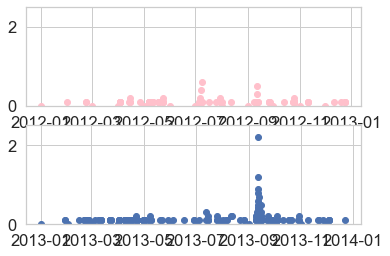

In [58]:
f, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(x=precip_2012.index.values,
           y=precip_2012["HPCP"],
           color="pink")
ax2.scatter(x=precip_2013.index.values,
           y=precip_2013["HPCP"])
ax1.set(ylim=[0,2.5])
ax2.set(ylim=[0,2.5])
plt.show()

In [65]:
precip_monthly = boulder_precip_2003_2013.resample("W").sum()

In [67]:
precip_monthly.dropna(how='all', inplace=True)

<AxesSubplot:xlabel='DATE'>

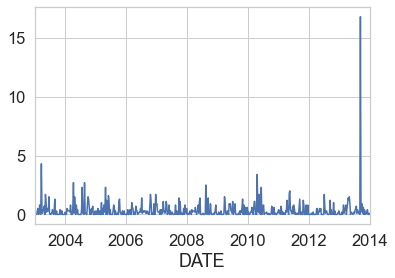

In [74]:
 precip_monthly['HPCP'].plot()

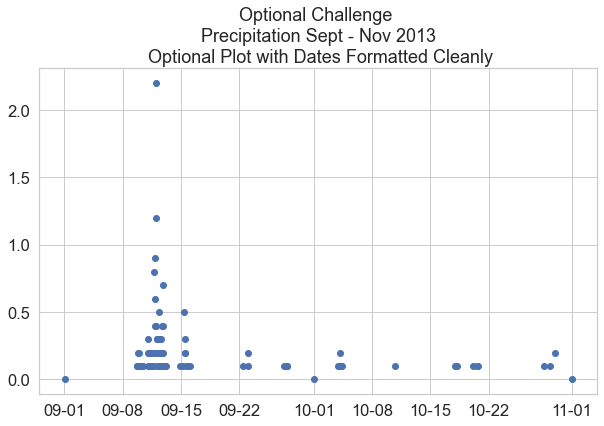

In [75]:
from matplotlib.dates import DateFormatter

flood_data = boulder_precip_2003_2013['2013-09-01':'2013-11-01']

f, ax = plt.subplots(figsize=(10,6))

ax.scatter(x=flood_data.index.values,
           y=flood_data["HPCP"])

#DEFINE THE DATe FORMAT
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.set(title="Optional Challenge \n Precipitation Sept - Nov 2013 \n Optional Plot with Dates Formatted Cleanly")
plt.show()
           


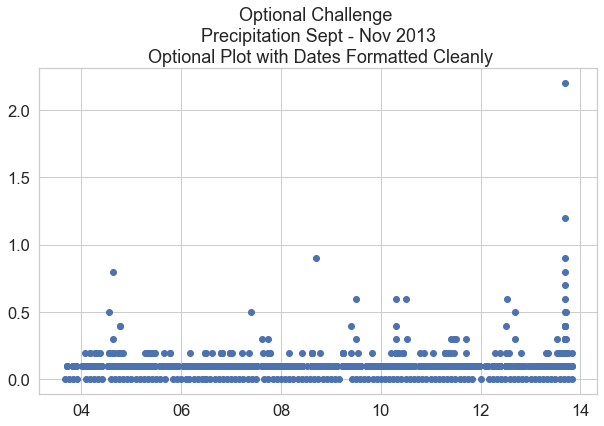

In [86]:
flood_data = boulder_precip_2003_2013['2003-09-01':'2013-11-01']

f, ax = plt.subplots(figsize=(10,6))

ax.scatter(x=flood_data.index.values,
           y=flood_data["HPCP"])

#DEFINE THE DATe FORMAT
date_form = DateFormatter("%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(title="Optional Challenge \n Precipitation Sept - Nov 2013 \n Optional Plot with Dates Formatted Cleanly")
plt.show()